In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Thesis_Elpida_Makri/Train_model/Detect_Atrial_Fibrillation

/content/drive/My Drive/Thesis_Elpida_Makri/Train_model/Detect_Atrial_Fibrillation


In [3]:
! ls 
! ls 1_class_data
! ls 1_class_data/dataset_3

1_class_data	my_datasets.py	my_train_2.py  __pycache__
logs		my_model.py	my_train.py    training.log
models_1_class	my_predict.py	predictions
af_dataset_ann.csv  dataset_3  X_test.npy  X_train.npy	y_test.npy  y_train.npy
dataset3_annotations.csv  dataset3_tracings.hdf5


In [9]:
import pandas as pd     
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import io

In [ ]:
df_data = pd.read_csv('./1_class_data/dataset_3/dataset3_annotations.csv')
df_af = df_data['AF']
df_af.to_csv('./1_class_data/af_dataset_ann.csv',index=False)

#Load dataset and split

Data are saved in this section, so start from Train model

In [ ]:
def load_dataset():

  data = pd.read_csv('./1_class_data/af_dataset_ann.csv')
  y = np.asarray(data)
  print(y.shape)

  with h5py.File('./1_class_data/dataset_3/dataset3_tracings.hdf5', 'r') as hdf:
    x = np.asarray(hdf['tracings']) 
  hdf.close()

  print(x.shape)

  X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.6, shuffle=False)

  return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = load_dataset()

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

(5170, 1)
(5170, 4096, 12)
X_train:  (3102, 4096, 12)
y_train:  (3102, 1)
X_test:  (2068, 4096, 12)
y_test:  (2068, 1)


In [ ]:
# save arrays
np.save('./1_class_data/X_train.npy',X_train)
np.save('./1_class_data/y_train.npy',y_train)
np.save('./1_class_data/X_test.npy',X_test)
np.save('./1_class_data/y_test.npy',y_test)

#Train model

In [ ]:
!python my_train.py ./1_class_data/X_train.npy ./1_class_data/y_train.npy

2021-06-08 09:27:19.676357: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
2021-06-08 09:27:21.858494: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-08 09:27:21.890628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-08 09:27:21.891214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-08 09:27:21.891257: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-08 09:27:21.893

continue training from next epoch (my_train_2.py)

In [ ]:
!python my_train_2.py ./1_class_data/X_train.npy ./1_class_data/y_train.npy --previous ./models_1_class/final_model_53.hdf5 --epoch 65

2021-06-08 09:48:10.524531: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
2021-06-08 09:48:13.019913: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-08 09:48:13.052418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-08 09:48:13.053022: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-08 09:48:13.053074: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-08 09:48:13.055

# Predict

In [ ]:
! python my_predict.py ./models_1_class/final_model_65.hdf5 ./1_class_data/X_test.npy ./1_class_data/y_test.npy --output_file ./predictions/1_class_prediction_70.npy

2021-06-08 09:51:21.621436: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
./models_1_class/final_model_65.hdf5
2021-06-08 09:51:29.452907: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-08 09:51:29.485266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-08 09:51:29.485854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-08 09:51:29.485904: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-08 09:51:29.490825: I tensor

#Evaluate

In [64]:
# load data
X_train = np.load('./1_class_data/X_train.npy')
y_train = np.load('./1_class_data/y_train.npy')
X_test = np.load('./1_class_data/X_test.npy')
y_test = np.load('./1_class_data/y_test.npy')

In [71]:
def get_optimal_precision_recall(y_true, y_score):
      """Find precision and recall values that maximize f1 score."""
      n = np.shape(y_true)[1]
      opt_precision = []
      opt_recall = []
      opt_threshold = []
      for k in range(n):
          # Get precision-recall curve
          precision, recall, threshold = precision_recall_curve(y_true[:, k], y_score[:, k])
          # Compute f1 score for each point (use nan_to_num to avoid nans messing up the results)
          f1_score = np.nan_to_num(2 * precision * recall / (precision + recall))
          # Select threshold that maximize f1 score
          index = np.argmax(f1_score)
          opt_precision.append(precision[index])
          opt_recall.append(recall[index])
          t = threshold[index-1] if index != 0 else threshold[0]-1e-10
          opt_threshold.append(t)
      return np.array(opt_precision), np.array(opt_recall), np.array(opt_threshold)

In [72]:
def make_y_pred(pred, t):
  
  npredictions = np.zeros(shape=pred.shape)
  print(npredictions.shape)
  
  for i in range(0, pred.shape[0]):
    for j in range(0, pred.shape[1]):
      if pred[i][j] >= t:
        npredictions[i][j] = 1
  
  return npredictions

In [73]:
def evaluate_model(y_pred, y_test):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, zero_division=0)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return accuracy, precision, recall, f1

In [75]:
model_pred = np.load('./predictions/1_class_prediction_70.npy')
opt_precision, opt_recall, opt_threshold = get_optimal_precision_recall(y_test, model_pred)
print(opt_precision, opt_recall, opt_threshold)

[0.11206897] [0.17808219] [0.12532048]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [76]:
y_pred = make_y_pred(model_pred, opt_threshold)
accuracy, precision, recall, f1 = evaluate_model(y_pred, y_test)

(2068, 1)


In [77]:
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1 score: ", f1)

accuracy:  0.9206963249516441
precision:  0.1111111111111111
recall:  0.1780821917808219
f1 score:  0.1368421052631579


#Plots

In [85]:
c = confusion_matrix(y_test, y_pred)

print("tn        fp")
print("____________")
print(c) 
print("____________")
print("fn        tp")

tn        fp
____________
[[1891  104]
 [  60   13]]
____________
fn        tp


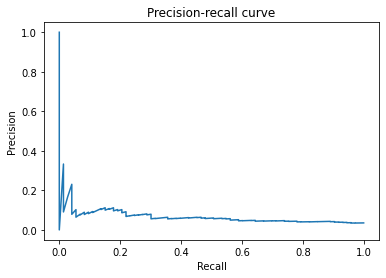

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, model_pred)
plt.figure()
plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision)


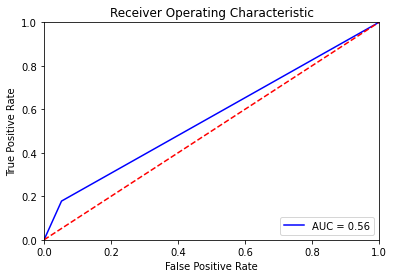

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Cases of atrial fibrillation in train dataset, test dataset and both

In [67]:
a1 = y_train.sum()
a2 = y_test.sum()

print(a1,"/3102 recordings + ",a2,"/2068 recordings = ", a1+a2)

125 /3102 recordings +  73 /2068 recordings =  198
